In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [4]:
from scipy.stats import binned_statistic

In [5]:
match = np.genfromtxt('photUtils0820/matchedPast.dat',names=True)

In [27]:
len(match)

1368

In [6]:
g_idx = np.logical_and(match['m606cAPER']>12,match['m814cAPER']>12)
match_g = match[g_idx]

In [19]:
han_i = match_g['pUmag_f814w']
han_v = match_g['pUmag_f606w']
aper_i = match_g['m814cAPER']
aper_v = match_g['m606cAPER']

aper_c = aper_v - aper_i
han_c = han_v - han_i

In [20]:
mean1 = np.mean(stats.sigmaclip(han_v-aper_v,4,4)[0])
median1 = np.median(stats.sigmaclip(han_v-aper_v,4,4)[0])

In [21]:
median2 = np.median(stats.sigmaclip(han_i-aper_i,4,4)[0])
median3 = np.median(stats.sigmaclip(han_c-aper_c,4,4)[0])

mean2 = np.mean(stats.sigmaclip(han_i-aper_i,4,4)[0])
mean3 = np.mean(stats.sigmaclip(han_c-aper_c,4,4)[0])

print(mean1,mean2,mean3)

0.009749421858611213 0.030540863723453535 -0.01816983898539538


In [22]:
mean1 = np.mean(han_v-aper_v)
mean2 = np.mean(han_i-aper_i)
mean3 = np.mean(han_c-aper_c)

print(mean1,mean2,mean3)

-0.039835120673784294 -0.016041234109920623 -0.02379388656386367


In [23]:
bin_means1, bin_edges1, binnum1= binned_statistic(aper_v, han_v-aper_v, \
                    bins=10, range=(19.5, 29),statistic='mean')
bin_width = (bin_edges1[1] - bin_edges1[0])
bin_cent1 = bin_edges1[1:] - bin_width/2

bin_means2, bin_edges2, binnum2= binned_statistic(aper_i, han_i-aper_i, \
                    bins=10, range=(19.5, 29),statistic='mean')

bin_width = (bin_edges2[1] - bin_edges2[0])
bin_cent2 = bin_edges2[1:] - bin_width/2

bin_means3, bin_edges3, binnum3= binned_statistic(aper_c, han_c-aper_c, \
                    bins=10, range=(-1,2.5),statistic='mean')

bin_width = (bin_edges3[1] - bin_edges3[0])
bin_cent3 = bin_edges3[1:] - bin_width/2

bin_means4, bin_edges4, binnum4= binned_statistic(aper_v, \
        han_v-aper_v, \
                    bins=10, range=(19.5,29),statistic='std')

bin_width = (bin_edges4[1] - bin_edges4[0])
bin_cent4 = bin_edges4[1:] - bin_width/2

bin_val4 = bin_means4/np.sqrt(len(aper_v))

bin_means5, bin_edges5, binnum5= binned_statistic(aper_i, \
        han_i-aper_i, \
                    bins=10, range=(19.5,29),statistic='std')

bin_width = (bin_edges5[1] - bin_edges5[0])
bin_cent5 = bin_edges5[1:] - bin_width/2

bin_val5 = bin_means5/np.sqrt(len(aper_i))

bin_means6, bin_edges6, binnum6= binned_statistic(aper_c, \
        han_c-aper_c, \
                    bins=10, range=(-1,2.5),statistic='std')

bin_width = (bin_edges6[1] - bin_edges6[0])
bin_cent6 = bin_edges6[1:] - bin_width/2

bin_val6 = bin_means6/np.sqrt(len(aper_c))

In [24]:
plt.rcParams['axes.grid'] = True

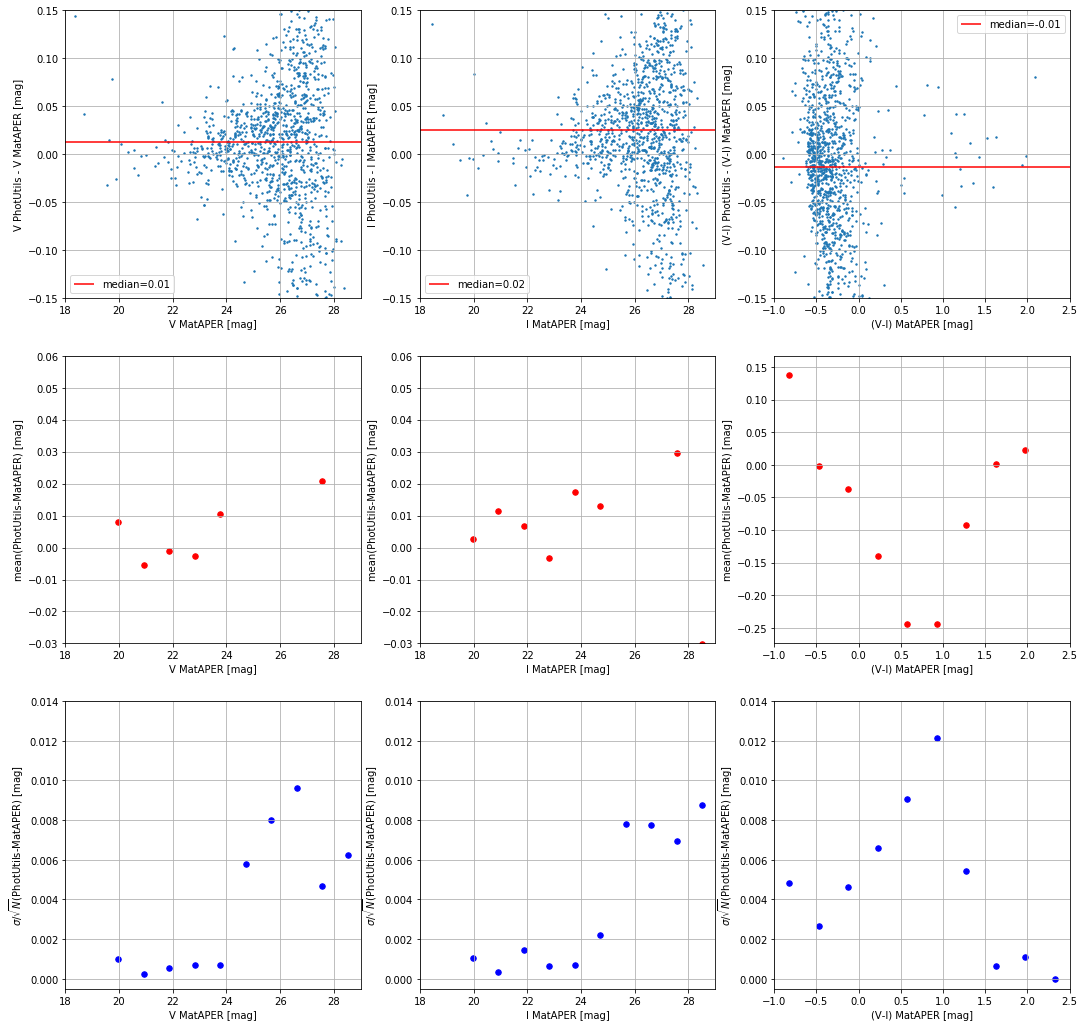

<Figure size 432x288 with 0 Axes>

In [28]:
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = \
    plt.subplots(3,3,figsize=(18,18))

ax1.scatter(aper_v,han_v-aper_v,s=2)
ax1.set_xlim(18,29)
ax1.set_ylim(-0.15,0.15)
ax1.hlines(median1,18,29,color='red',label='median={0:.2f}'.format(median1))
ax1.set_ylabel('V PhotUtils - V MatAPER [mag]')
ax1.set_xlabel('V MatAPER [mag]')
ax1.legend()

ax2.scatter(aper_i,han_i-aper_i,s=2)
ax2.set_xlim(18,29)
ax2.set_ylim(-0.15,0.15)
ax2.hlines(median2,18,29,color='red',label='median={0:.2f}'.format(median2))
ax2.set_ylabel('I PhotUtils - I MatAPER [mag]')
ax2.set_xlabel('I MatAPER [mag]')
ax2.legend()

ax3.scatter(aper_c,han_c-aper_c,s=2)
ax3.set_xlim(-1,2.5)
ax3.set_ylim(-0.15,0.15)
ax3.hlines(median3,-1,2.5,color='red',label='median={0:.2f}'.format(median3))
ax3.set_ylabel('(V-I) PhotUtils - (V-I) MatAPER [mag]')
ax3.set_xlabel('(V-I) MatAPER [mag]')
ax3.legend()

ax4.scatter(bin_cent1,bin_means1,s=30,color='red')
ax4.set_xlim(18,29)
ax4.set_ylim(-0.03,0.06)
ax4.set_ylabel('mean(PhotUtils-MatAPER) [mag]')
ax4.set_xlabel('V MatAPER [mag]')

ax5.scatter(bin_cent2,bin_means2,s=30,color='red')
ax5.set_xlim(18,29)
ax5.set_ylim(-0.03,0.06)
ax5.set_ylabel('mean(PhotUtils-MatAPER) [mag]')
ax5.set_xlabel('I MatAPER [mag]')

ax6.scatter(bin_cent3,bin_means3,s=30,color='red')
ax6.set_xlim(-1,2.5)
# ax6.set_ylim(-0.03,0.06)
ax6.set_ylabel('mean(PhotUtils-MatAPER) [mag]')
ax6.set_xlabel('(V-I) MatAPER [mag]')

ax7.scatter(bin_cent4,bin_val4,s=30,color='blue')
ax7.set_xlim(18,29)
ax7.set_ylim(-0.0005,0.014)
ax7.set_xlabel('V MatAPER [mag]')
ax7.set_ylabel(r'$\sigma$/$\sqrt{N}$(PhotUtils-MatAPER) [mag]')

ax8.scatter(bin_cent5,bin_val5,s=30,color='blue')
ax8.set_xlim(18,29)
ax8.set_ylim(-0.0005,0.014)
ax8.set_xlabel('I MatAPER [mag]')
ax8.set_ylabel(r'$\sigma$/$\sqrt{N}$(PhotUtils-MatAPER) [mag]')

ax9.scatter(bin_cent6,bin_val6,s=30,color='blue')
ax9.set_xlim(-1,2.5)
ax9.set_ylim(-0.0005,0.014)
ax9.set_xlabel('(V-I) MatAPER [mag]')
ax9.set_ylabel(r'$\sigma$/$\sqrt{N}$(PhotUtils-MatAPER) [mag]')


plt.show()
plt.savefig('PhotUtilsMatAPER_allMatched.png',dpi=600,bbox_inches='tight')

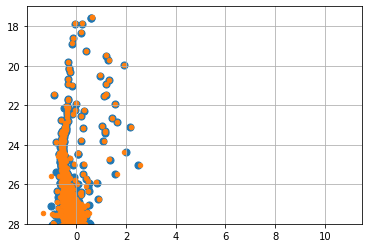

In [16]:
fig,ax = plt.subplots()


ax.scatter(aper_c,aper_i,s=50)
ax.scatter(han_c,han_i,s=20)

ax.set_ylim(28,17)
plt.show()

In [27]:
y = match_g['magAPER_814']-match_g['mag814']
x = match_g['magAPER_814']

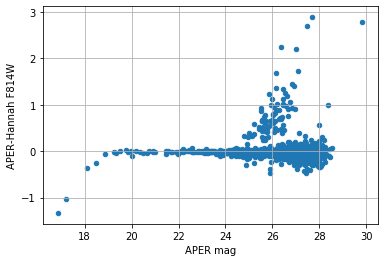

In [28]:
fig,ax = plt.subplots()

ax.scatter(x,y,s=20)

ax.set_ylabel('APER-Hannah F814W')
ax.set_xlabel('APER mag')

plt.show()

In [31]:
file = np.genfromtxt('catRawMags1305/catDir/matchedFLCdrc0506r2.dat',names=True)

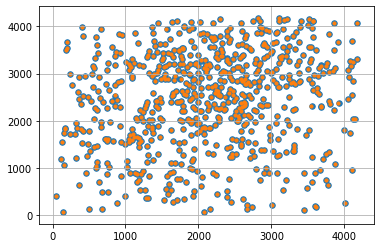

In [33]:
fig, ax = plt.subplots()


ax.scatter(file['xDRC_trans'],file['yDRC_trans'],s=30)
ax.scatter(file['xDRC_mat'],file['yDRC_mat'],s=10)

plt.show()